# U.S. Medical Insurance Costs

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('insurance.csv')
print(df.head(2))

   age     sex    bmi  children smoker     region     charges
0   19  female  27.90         0    yes  southwest  16884.9240
1   18    male  33.77         1     no  southeast   1725.5523


# 1. Cleaning data first 

In [3]:
#check for types of data in the dataframe
print(df.dtypes)
#and lets find out how many rows of data there is 
print(len(df))

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object
1338


In [4]:
#All data is appropraite to make do data analysis on 
#Lets drop all potential nan's though
df = df.dropna()
#now lets see if any data was dropped off of the 1338
print(len(df))


1338


# 2. What questions do we want to answer?

1. does region, smoker, bmi, age and sex make a statistically significant difference in cost
2. assuming that 26 is the healthiest age (physical prime of life) will it be better than all other times youger and older in cost
3. which factor is the most significant to changing the patients charge amount.


# 3. Get descriptive stats and visualization to understand the data. 

In [5]:
#find unique data in needed columns like childern and region
print(df.children.unique())
print(df.region.unique())
#age stats
age_av = np.mean(df.age)
age_std = np.std(df.age)
#sex info
male_num = len(df.loc[df.sex == 'male'])
female_num = len(df.loc[df.sex == 'female'])
male_charge = df.loc[df.sex == 'male']['charges']
female_charge = df.loc[df.sex == 'female']['charges']
avg_male = male_charge.mean()
avg_female = female_charge.mean()
print('This is the avg charge for each male ' + str(avg_male))
print('This is the avg charge for each female ' + str(avg_female))
#bmi stats
bmi_av = np.mean(df.bmi)
bmi_std = np.std(df.bmi)
#children info
zero = df.children[df.children == 0]
zero_count = zero.count()
print('Count of zero children ' + str(zero_count))
one = df.children[df.children == 1]
one_count = one.count()
print('Count of one child ' + str(one_count))
two = df.children[df.children == 2]
two_count = two.count()
print('Count of two children ' + str(two_count))
three = df.children[df.children == 3]
three_count = three.count()
print('Count of three children ' + str(three_count))
four = df.children[df.children == 4]
four_count = four.count()
print('Count of four children ' + str(four_count))
#smoker num of yes vs no's
smoke_no = df.smoker[df.smoker == 'no']
smoke_yes = df.smoker[df.smoker == 'yes']
#region num
sw = df.region[df.region == 'southwest']
sw_count = sw.count()
se = df.region[df.region == 'southeast']
se_count = se.count()
nw = df.region[df.region == 'northwest']
nw_count= nw.count()
ne = df.region[df.region == 'northeast']
ne_count = ne.count()
#charges stats
char_mean = np.mean(df.charges)
char_median = np.median(df.charges)
char_std = np.std(df.charges)
char_max = df.charges.max()
all_data_max = df[df.charges == df.charges.max()]
char_min = df.charges.min()
q1 = np.quantile(df.charges, .25)
q3 = np.quantile(df.charges, .75)
char_iqr = q3 - q1
print(char_min)
print(char_iqr)
print('This is the range for charges ' + str(char_max - char_min))
print('This is the max for charges ' + str(char_max))
print(all_data_max)
print('This is charges mean ' + str(char_mean))
print('This is charges median ' + str(char_median))

[0 1 3 2 5 4]
['southwest' 'southeast' 'northwest' 'northeast']
This is the avg charge for each male 13956.751177721893
This is the avg charge for each female 12569.578843835347
Count of zero children 574
Count of one child 324
Count of two children 240
Count of three children 157
Count of four children 25
1121.8739
11899.625365
This is the range for charges 62648.554110000005
This is the max for charges 63770.42801
     age     sex    bmi  children smoker     region      charges
543   54  female  47.41         0    yes  southeast  63770.42801
This is charges mean 13270.422265141257
This is charges median 9382.033


Text(0.5, 0, 'charge amount')

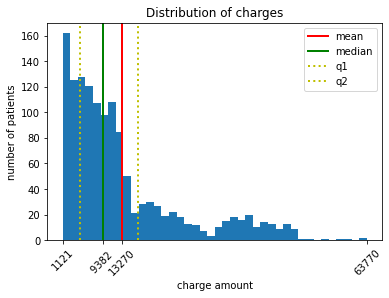

In [6]:
#lets use some visualization to get understand the data
#first we will start with the charges distribution 
from matplotlib import pyplot as plt
ax = plt.subplot()
plt.hist(df.charges, bins= 40)
plt.axvline(char_mean, linewidth = 2, color = 'r')
plt.axvline(char_median, linewidth = 2, color = 'g')
plt.axvline(q1, linewidth = 2, linestyle= 'dotted', color = 'y')
plt.axvline(q3, linewidth = 2, linestyle= 'dotted', color = 'y')
ax.set_xticks([char_min, char_mean, char_median, char_max])
ax.set_xticklabels(['1121', '13270', '9382 ','63770'], rotation = 45)
plt.legend(['mean', 'median', 'q1', 'q2'])
plt.title('Distribution of charges')
plt.ylabel('number of patients')
plt.xlabel('charge amount')


Analysis of the 'Distribution of charges' graph
1. We see that the mean is skewed to the right compared to the median. This makes me aware of potential outlier issues in the data.
2. The Range is large 62648.5 which could also bring attention to some outlier issues
3. The max is 63770.4 which is a women with multiple high risk factors (smoking, above 50 , bmi high) and her charges are noticably higher than any other charge.
4. The mean is 13270.4 and the median is 9382.0. due to all the factors previously stated I will stick with the median as a better analysis of center. 
5. 69% of our data lies between the interquartile range (iqr) which is 11899.6, and this is shown by the two dotted yellow lines in the graph above.

[Text(-1, 0, 'southwest'),
 Text(0, 0, 'southeast'),
 Text(1, 0, 'northwest'),
 Text(2, 0, 'northeast')]

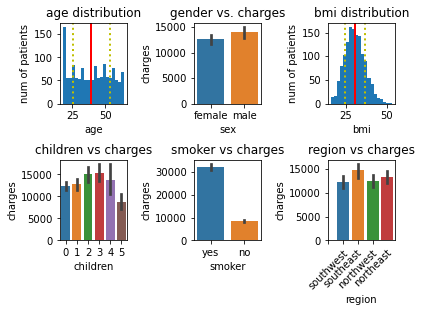

In [7]:
#now lets make subplots of the rest of the data we want to compare the charges to

#age
plt.subplot(2, 3, 1)
plt.hist(df.age, bins= 20)
plt.axvline(age_av, linewidth = 2, color = 'r')
plt.axvline(age_av - age_std, linewidth = 2, color = 'y', linestyle= 'dotted')
plt.axvline(age_av + age_std, linewidth = 2, color = 'y', linestyle= 'dotted')
plt.title('age distribution')
plt.xlabel('age')
plt.ylabel('num of patients')
#sex
import seaborn as sns
ax = plt.subplot(2, 3, 2)
plt.title('gender vs. charges')
sns.barplot(data = df, x = 'sex', y= 'charges')
plt.subplots_adjust(wspace = 1.0)
#bmi
ax = plt.subplot(2, 3, 3)
plt.hist(df.bmi, bins= 20)
plt.axvline(bmi_av, linewidth = 2, color = 'r')
plt.axvline(bmi_av - bmi_std, linewidth = 2, linestyle = 'dotted', color = 'y')
plt.axvline(bmi_av + bmi_std, linewidth = 2, linestyle = 'dotted', color = 'y')
plt.title('bmi distribution')
plt.xlabel('bmi')
plt.ylabel('num of patients')
#children
ax = plt.subplot(2, 3, 4)
sns.barplot(data = df, x = 'children', y = 'charges')
plt.title('children vs charges')
plt.subplots_adjust(hspace= .7)
#smokers
ax = plt.subplot(2, 3, 5)
sns.barplot(data = df, x = 'smoker', y = 'charges')
plt.title('smoker vs charges')
plt.xlabel('smoker')
plt.ylabel('charges')
#region
n = df.region.unique()
ax = plt.subplot(2, 3, 6)
sns.barplot(data = df, x = 'region', y = 'charges', )
plt.title('region vs charges')
plt.xlabel('region')
plt.ylabel('charges')
ax.set_xticks([-1, 0, 1, 2])
ax.set_xticklabels(['southwest', 'southeast' ,'northwest', 'northeast'], rotation = 45)

We can see a few things to start to check out 
1. The distribution of age seems relatively uniform except for the earliest age documented. 
2. gender doesn't seem to make too much difference even though males pay more on average. we should check if statistically significant 
3. bmi this looks like a unimodal normal distribution. 
4. the cost of average seems to peak at 3 children for the cost, but is the p value truely significant
5. in our visualization we can see that most likely smoking increases the cost of healthcare.
6. as for region southeast seems the highest average, but is it statistically significant. 

*lets first check the visualization of bmi and age compared to charges

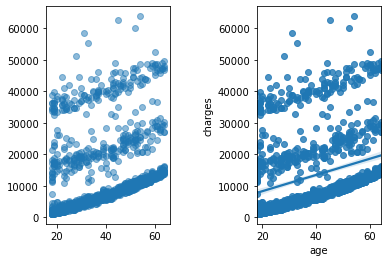

In [8]:
plt.close()
plt.subplot(1, 2, 1)
plt.scatter(df.age, df.charges, alpha =.5)

plt.subplot(1, 2, 2)
sns.regplot(data= df, x = 'age', y = 'charges')
plt.subplots_adjust(wspace = .7)

the regression line looks like there is correlation

now lets check out bmi

Text(0, 0.5, 'charges')

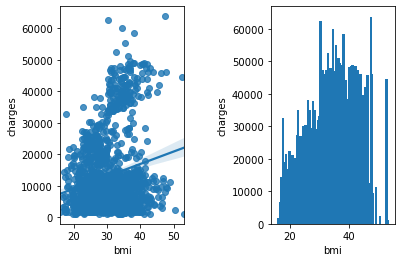

In [9]:
plt.subplot(1, 2, 1)
sns.regplot(data = df, x ='bmi', y = 'charges')
plt.subplot(1, 2, 2)
plt.bar(df.bmi, df.charges)
plt.subplots_adjust(wspace= .7)
plt.xlabel('bmi')
plt.ylabel('charges')


If you look at all six parameters it looks like smoker makes the biggest difference.
- lets test out if all 6 are significant

# 4. Hypothesis Testing

In [15]:
#lets test age vs. charges first using 2 sample t test
from scipy.stats import ttest_ind
tstatistic, pval = ttest_ind(df.age, df.charges)

if pval < 0.05:
    print('age makes a difference to the amount charged '+ str(pval))
else:
    print('Age doesn\'t make a big differnce')


age makes a difference to the amount charged 2.937026592464817e-274


In [16]:
#next lets test gender vs charges we have categorical data so lets do chi squared
from scipy.stats import chi2_contingency
print(male_num)
print(female_num)
print(avg_male)
print(avg_female)
x = [[676, 13956],[662, 12569]]
chi2, pval2, dof, expected = chi2_contingency(x)
print(pval2)

if pval2 < 0.05:
    print('gender makes a significant difference in medical charges ' +str(pval2))
else:
    print('gender does\'t make a difference in medical charges')


676
662
13956.751177721893
12569.578843835347
0.1424788833883338
gender does't make a difference in medical charges


In [17]:
#now lests use a 2 sample t-test on the numerical data of bmi versus medical charges
tstatistic, pval3 = ttest_ind(df.bmi, df.charges)
if pval3 < 0.05:
    print('bmi makes a significant difference in medical charges ' +str(pval3))
else:
    print('bmi doesn\'t make a big difference in medical charges')

bmi makes a significant difference in medical charges 1.5383565479086166e-274
